<a href="https://colab.research.google.com/github/snehalad/nlp-disaster-tweets-classification/blob/main/disaster-tweets_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deiving information out of natural language (could be sequence text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

Natural language is a broad term but you can consider it to cover any of the following:

- Text (such as that contained in an email, blog post, book, Tweet)
- Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)

NLP Flow:
```
Text -> turn into numbers -> build a model -> train the model to find patterns -> use patterns (make predictions)

```
[Vectorization NLP](analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/#:~:text=To%20convert%20the%20text%20data,text%20data%20to%20numerical%20vectors.)


## Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ddfaa9e3-0ce8-7785-5d14-a120bc52ebb8)


## Get helper function

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-03-09 11:33:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-09 11:34:00 (72.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is kaggle's introduction to NLP dataset (text sample of tweets labelled as disaster or not)

source : https://www.kaggle.com/competitions/nlp-getting-started/data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip data
unzip_data("nlp_getting_started.zip")

--2023-03-09 11:34:07--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.009s  

2023-03-09 11:34:07 (66.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# shuffle training dataframe
train_df_shuffle = train_df.sample(frac=1, random_state=42)
train_df_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# what the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# how many example of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# how many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# let's visualize some random training example
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffle[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "{real disaster}" if target>0 else "{not real disaster}")
  print(f"Text: {text}")
  print(f"-----\n")

Target: 1 {real disaster}
Text: Doves - The Storm + Greatest Denier (Electric Proms Pt4) http://t.co/xjTpV4OydL
-----

Target: 1 {real disaster}
Text: #NASA announced that a massive #solar storm is headed straight for us: http://t.co/CM5u55MiOl
-----

Target: 0 {not real disaster}
Text: @StephanieMarija 'light rain' was the forecast I based my dressing on. Light. Rain. Not incessant deluge!
-----

Target: 1 {real disaster}
Text: I think a Typhoon just passed through here lol
-----

Target: 0 {not real disaster}
Text: Shirley Caesar - Windstorm http://t.co/KoCH8SLasQ #nowplaying #listenlive
-----



## Split data into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data
train_sentences, val_sentence, train_labels, val_labels = train_test_split(train_df_shuffle["text"].to_numpy(),
                                                                           train_df_shuffle["target"].to_numpy(),
                                                                           test_size=0.1,
                                                                           random_state=42)

In [ ]:
# check lengths
len(train_sentences), len(train_labels), len(val_sentence), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting Text into Numbers

In NLP, there are two main concepts for turning text into numbers

1. Tokenization - A straight mapping from word or character or sub-word to a numerical value.
- word-level tokenization
- character-level tokenization
- sub-word tokenization

2. Embeddings -word embedding is the process of converting text data to numerical vectors.  An embedding is a representation of natural language which can be learned.
- Create your own embedding (tf.keras.layers.Embedding)
- Resuse a pre-learned embedding 


In [ ]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization prameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in vocabulary (auto add <oov>)
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # create groups of n-words?
                                    output_mode='int', # how to map token to numbers
                                    output_sequence_length=None, # how long do you want your sequence to be?
                                    pad_to_max_tokens=False)

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# find average number of tokens (word) in training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
# seup text vectorization variables
max_vocab_length=10000 # max number of words to have in our vocabulary
max_length = 15 # max lenght our sequences will be (eg. how many words from a tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# fit the text vectorizer to training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# create a sample sentence and tokenize it
sample_sentense = "There is a flood in my street!"
text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text: \n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text: 
 Senators calling for emergency housing: Boxer Feinstein back plan to move #homeless vets to VA campus http://t.co/Gm80X3vutf      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[8664, 1705,   10,   73, 2433, 3141, 5657,   88,  241,    5,  769,
        2093, 2619,    5, 2623]])>

In [ ]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab :{len(words_in_vocab)}\
      \n5 most common words: {top_5_words}\
      \n5 least common words: {bottom_5_words}")

Number of words in vocab :10000      
5 most common words: ['', '[UNK]', 'the', 'a', 'in']      
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding LAyer

To make our embedding, we're going to use Tensorflow's embedding layer:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layers:
- `input_dim` : Size of the vocabulary
- `output_dim` : Size of output embedding vector, for eg. a value of 100 would mean each token gets reprented by a vector 100 long
- `input_lenght` : Length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,# set input shape
                             output_dim=128, # output shape
                             input_length=max_length # how long is each input
                             )
embedding

In [ ]:
# get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text \n {random_sentence}\
    \n\n Embedbed version:")

# Embeded the random sentence (turn sentence into numetric form)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text 
 I just made a weird high pitched noise and then I heard a siren ofnsixjks ??????    

 Embedbed version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01507868, -0.0357944 , -0.00058181, ..., -0.02154465,
         -0.00363879, -0.01299015],
        [ 0.04006595,  0.02393884,  0.04324177, ..., -0.0139709 ,
          0.01496125, -0.02663397],
        [ 0.01767914,  0.04122286, -0.00791372, ...,  0.04006625,
         -0.01908134, -0.01173701],
        ...,
        [ 0.04695362, -0.04032891, -0.04796262, ..., -0.00352197,
         -0.01576615,  0.02364695],
        [ 0.04981569,  0.01300354, -0.00632912, ..., -0.04183821,
          0.00304103, -0.03175875],
        [-0.04703338,  0.03654352,  0.01483021, ...,  0.00575266,
          0.04832793, -0.00265867]]], dtype=float32)>

In [ ]:
# check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.01507868, -0.0357944 , -0.00058181,  0.02489319,  0.01729324,
        -0.04607768, -0.02827063,  0.04034693, -0.03852577, -0.0021318 ,
         0.04878419,  0.03518851,  0.0480201 ,  0.02089932,  0.02991103,
         0.03813303,  0.01427453, -0.03254842,  0.02529887,  0.01631561,
         0.007138  ,  0.01195035, -0.0350057 , -0.01592553,  0.02251747,
         0.00706721,  0.0432549 ,  0.01987579, -0.03869933,  0.04992059,
         0.03220553, -0.0019895 ,  0.02761516,  0.04943143,  0.00612081,
         0.035689  , -0.02686528,  0.04204706, -0.00466963,  0.01307306,
         0.03997489, -0.03583685,  0.0425523 ,  0.00857929, -0.042886  ,
         0.01387472, -0.01234444,  0.01361645,  0.03112436,  0.01654396,
        -0.01716577,  0.02294989, -0.04055657,  0.0241176 , -0.02178047,
         0.04997337, -0.03773042, -0.00432303, -0.03213724, -0.00485873,
        -0.03185221,  0.01714555, -0.02023832, -0.01604642,  0.02180493,
  

## Modeling a text dataset (running a series of experiments)

Now we've a got way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.
we'll start with a baseline and move on from there.
- Model 0: Naive Bayes (baseline), this is from ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- Model 1 : Feed-forward neural network (dense model)
- Model 2 : LSTM model (RNN)
- Model 3 : GRU model (RNN)
- Model 4 : Bidirectional-LSTM model (RNN)
- Model 5 : 1D Convolutional neural network
- Model 6 : Tensorflow Hub Pretrained Feature Extractor (using trasfer learning for NLP)
- Model 7 : Same as model 6 with 10% training data

*Steps in modelling with tensorflow:*
- Create a model
- Build a model
- Fit a model
- Evaluate our model


#### Model 0 : Getting a Baseline
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experimets to build upon.

To create our baseline, we'll use Sklearn's multinominal Naive Bayes using the TF-IDF formula to convert our words to numbers.

🔑 Note : It's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert word to numbers using tfidf
     ("clf", MultinomialNB()) # model the text
])

# fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# evaluate our basline model 
baseline_score = model_0.score(val_sentence, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# make predictions
baseline_preds = model_0.predict(val_sentence)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Creating an evaluation function for our model experimets

Metrics are:
- Accuracy
- Precision
- Recall
- F1-score



In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_result(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification
  """
  # calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1}
  return model_results

In [ ]:
# Get baseline result
baseline_result = calculate_result(y_true=val_labels,
                                   y_pred=baseline_preds)
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 : A Simple dense model

In [ ]:
# Create a tensorboard callback 
from helper_functions import create_tensorboard_callback

# create a directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230309-113415
Epoch 1/5
215/215 [==============================] - 16s 51ms/step - loss: 0.6110 - accuracy: 0.7046 - val_loss: 0.5380 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4404 - accuracy: 0.8170 - val_loss: 0.4685 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3464 - accuracy: 0.8593 - val_loss: 0.4640 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2840 - accuracy: 0.8897 - val_loss: 0.4634 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2373 - accuracy: 0.9121 - val_loss: 0.4800 - val_accuracy: 0.7835


In [ ]:
# check the results
model_1.evaluate(val_sentence, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7835


[0.4800173044204712, 0.7834645509719849]

In [ ]:
# make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentence)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
# look at single prediction
model_1_pred_probs[0]

array([0.33020705], dtype=float32)

In [ ]:
# look at first 10
model_1_pred_probs[:10]

array([[0.33020705],
       [0.74288416],
       [0.99799013],
       [0.10754776],
       [0.13115104],
       [0.9370377 ],
       [0.922447  ],
       [0.99317753],
       [0.96509606],
       [0.2614424 ]], dtype=float32)

In [ ]:
# convert model prediction probability to labels
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate our model 1 results
model_1_results = calculate_result(y_true=val_labels,
                                   y_pred=model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7888731352165597,
 'recall': 0.7834645669291339,
 'f1': 0.780192419920975}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representatio of eavh token in our training data, which have been learned for -5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

Now we got the embedding matrix our model has learned to represent our tokens.
Tensorflow has a handy tool called projector : https://projector.tensorflow.org/

And TensorFlow also has an incredible guide on word embedding themselves : https://www.tensorflow.org/text/guide/word_embeddings

resources : https://jalammar.github.io/illustrated-word2vec/

In [ ]:
# creading embedding files 
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from colab to upload to projector
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

# *Recurrent Neural Network (RNN)*

RNN's are useful for sequence data.

The Premises of a recurrent neural network is to use the reprsentation of a previous input to aid the      representation of later input.


### Model 2 : LSTM

[About Deep Learning Algorithms](https://www.simplilearn.com/tutorials/deep-learning-tutorial/deep-learning-algorithm)

LSTM = long short term memory (one of the most popular LSTM cells)

Our Structure of an RNN typically looks Like:


```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/dense) -> Output (label probability) 
```

In [ ]:
# Create a LSTM model
tf.random.set_seed(42)
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
# print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# compile the model 
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                      "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230309-113440
Epoch 1/5
215/215 [==============================] - 12s 34ms/step - loss: 0.2205 - accuracy: 0.9235 - val_loss: 0.5461 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1610 - accuracy: 0.9419 - val_loss: 0.6068 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1271 - accuracy: 0.9523 - val_loss: 0.7495 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1058 - accuracy: 0.9604 - val_loss: 0.8461 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0824 - accuracy: 0.9664 - val_loss: 0.9538 - val_accuracy: 0.7795


In [ ]:
# make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentence)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[3.5048523e-03],
       [7.0155275e-01],
       [9.9964273e-01],
       [2.4110405e-02],
       [2.5265024e-04],
       [9.9846601e-01],
       [7.0836496e-01],
       [9.9980575e-01],
       [9.9964380e-01],
       [5.3617954e-01]], dtype=float32)

In [ ]:
# convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# calculate model 2 results
model_2_results = calculate_result(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7816545659065345,
 'recall': 0.7795275590551181,
 'f1': 0.7774022539420016}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3 : GRU
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parametrs.

In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
# x = layers.GRU(64, return_sequences=True)(x)
# print(x.shape)
# x = layers.LSTM(42, return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(99)(x)
# print(x.shape)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
# compile a model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                      "model_3_LSTM")])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20230309-113501
Epoch 1/5
215/215 [==============================] - 13s 37ms/step - loss: 0.1572 - accuracy: 0.9496 - val_loss: 0.6836 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0845 - accuracy: 0.9696 - val_loss: 0.8413 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0687 - accuracy: 0.9739 - val_loss: 1.1390 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0580 - accuracy: 0.9762 - val_loss: 1.0097 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0500 - accuracy: 0.9774 - val_loss: 1.1242 - val_accuracy: 0.7730


In [ ]:
# make predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentence)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.1518263e-03],
       [6.0648191e-01],
       [9.9958950e-01],
       [2.1931869e-01],
       [1.4104084e-05],
       [8.4286040e-01],
       [1.5821733e-02],
       [9.9983263e-01],
       [9.9962938e-01],
       [4.0622658e-01]], dtype=float32)

In [ ]:
# convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate model 3 results
model_3_results = calculate_result(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.783781518328173,
 'recall': 0.7729658792650919,
 'f1': 0.7675425817674429}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 4 : Bidirectional RNN

A Bidirectional RNN is a combination of two RNNs training the network in opposite directions, one from the beginning to the end of a sequence, and the other, from the end to the beginning of a sequence.



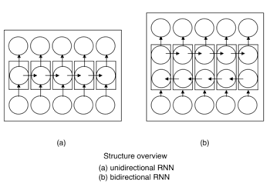

In [ ]:
# Build bidirectional cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

(None, 15, 128)
(None, 128)


🔑**Note** : As you can notice we got (None, 15, 128) shape but we pass 64 vector, reason is that directional goes right to left and left to right that means 64*2 = 128

In [ ]:
# get summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230309-113526
Epoch 1/5
215/215 [==============================] - 12s 41ms/step - loss: 0.1140 - accuracy: 0.9664 - val_loss: 0.9304 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0558 - accuracy: 0.9766 - val_loss: 1.1819 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0457 - accuracy: 0.9793 - val_loss: 1.3209 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0419 - accuracy: 0.9804 - val_loss: 1.3276 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0411 - accuracy: 0.9806 - val_loss: 1.4669 - val_accuracy: 0.7638


In [ ]:
# make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentence)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[3.4948487e-02],
       [7.2331280e-01],
       [9.9998343e-01],
       [2.1407038e-01],
       [1.0277471e-05],
       [9.9991190e-01],
       [9.9631304e-01],
       [9.9999452e-01],
       [9.9998987e-01],
       [9.9470150e-01]], dtype=float32)

In [ ]:
# convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# calculate results of our bidirectional model
model_4_results = calculate_result(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.37795275590551,
 'precision': 0.7645678751509686,
 'recall': 0.7637795275590551,
 'f1': 0.7620205519156684}

# *Convolution Neural Networks (CNN) for Text (and other types of sequences)*

We've used CNNs for images but images are typically 2D(heights x width)... however, our text data is 1D.

Previously we've Conv2D for our image data but now we're going to use Conv1D

The typical structure of Conv1D model for sequences(in our case, text)

```
input(text) -> Tokenization -> Embedding -> Layers (typically conv1D + Pooling) -> Outputs(class probabilities)
```


### Model 5: Conv 1D

In [ ]:
# Test out our embedding layers, conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # 5 words at a time (logic same as ngram)
                        activation="relu",
                        padding="valid") # default = "valid" output is samaller than input, "same" = output is same as input
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
max_pool_output


<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.0685498 , 0.06111756, 0.05751116, 0.02513674, 0.02713765,
        0.0068716 , 0.01262163, 0.05117726, 0.09522825, 0.07491477,
        0.07448845, 0.03213466, 0.03063702, 0.06430008, 0.        ,
        0.00854165, 0.01018682, 0.0303558 , 0.        , 0.05405369,
        0.04806191, 0.0197476 , 0.02357347, 0.02020168, 0.05106865,
        0.0147088 , 0.00229283, 0.04378598, 0.01047137, 0.10198332,
        0.04018363, 0.00940425]], dtype=float32)>

In [ ]:
# create 1d convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPooling1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# summary of model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [ ]:
# fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_conv1D")])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20230309-113552
Epoch 1/5
215/215 [==============================] - 10s 35ms/step - loss: 0.1223 - accuracy: 0.9585 - val_loss: 0.8629 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0746 - accuracy: 0.9710 - val_loss: 1.0503 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0627 - accuracy: 0.9753 - val_loss: 1.1116 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0560 - accuracy: 0.9771 - val_loss: 1.1848 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0509 - accuracy: 0.9781 - val_loss: 1.2441 - val_accuracy: 0.7638


In [ ]:
# make some prediction 
model_5_pred_probs = model_5.predict(val_sentence)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[5.8212999e-02],
       [6.9714725e-01],
       [9.9985886e-01],
       [6.5466389e-02],
       [6.0273891e-08],
       [9.8957622e-01],
       [9.6684998e-01],
       [9.9998116e-01],
       [9.9999964e-01],
       [8.3756876e-01]], dtype=float32)

In [ ]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# evaluate model 5 predictions
model_5_results = calculate_result(y_true=val_labels,
                                   y_pred=model_5_pred)
model_5_results

{'accuracy': 76.37795275590551,
 'precision': 0.7649838845988884,
 'recall': 0.7637795275590551,
 'f1': 0.761768588939328}

# Model 6 : Tensorflow Hub Pretrained Senetnce Encoder

In [ ]:
sample_sentense

'There is a flood in my street!'

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentense,
                       "When you can the universal senetence encoder on a sentence, it convert into number."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068851  0.02425465 -0.01405769  0.01434426  0.08292625
  0.0196337   0.0616014  -0.003527   -0.01216414  0.00978647 -0.01248498
  0.01232347  0.09748451  0.06141113 -0.03728352  0.01860887 -0.04669853
  0.00413913 -0.06363908 -0.02469896  0.02713692  0.02284443 -0.00210029
 -0.00630592 -0.0396496   0.02220408  0.00115074 -0.03132182  0.00119527
 -0.04012549  0.04561896 -0.01530597 -0.00175915  0.02173133 -0.08450424
  0.03340027  0.04604554 -0.02480249 -0.08681662  0.00702696 -0.00770476
 -0.01434537  0.07814164 -0.10676058 -0.05152997 -0.00858159 -0.03232228
 -0.03871096  0.02581472], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape 
# The input is variable length English text and the output is a 512 dimensional vector.

TensorShape([512])

In [ ]:
# create a keras leyer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# create model using the sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentence, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230309-113635
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.5057 - accuracy: 0.7856 - val_loss: 0.4482 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4152 - accuracy: 0.8158 - val_loss: 0.4370 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4007 - accuracy: 0.8197 - val_loss: 0.4327 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3939 - accuracy: 0.8254 - val_loss: 0.4284 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3883 - accuracy: 0.8285 - val_loss: 0.4299 - val_accuracy: 0.8163


In [ ]:
# make predictions with USE TF hub model
model_6_pred_probs = model_6.predict(val_sentence)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.1570066 ],
       [0.7446776 ],
       [0.9877511 ],
       [0.19960617],
       [0.7283781 ],
       [0.6844635 ],
       [0.9817423 ],
       [0.97646743],
       [0.9232991 ],
       [0.09719217]], dtype=float32)

In [ ]:
# convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate model 6 performance metrics
model_6_result = calculate_result(y_true=val_labels,
                                  y_pred=model_6_preds)
model_6_result

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

In [ ]:
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 7 : TF Hub pretrained USE but with 10% of training data

Transfer Learning really helps when you don't have large dataset



In [ ]:
train_df_shuffle.shape

(7613, 5)

In [ ]:
# Note: Making data split like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100%)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# # create subset of 10% of the training data
# train_10_percent = train_df_shuffle[["text", "target"]].sample(frac=0.1, random_state=42)
# print(train_10_percent.shape)

# # divide into label n features
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

🔑**Note**: Be very aware while splitting data into train/val/test dataset otherwise because of data lekage you can't evaluate metrics correctly.

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [ ]:
import numpy as np
# check the number of targets in our subset of data
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# check the number of targets in our subset of data
# train_10_percent['target'].value_counts()

In [ ]:
train_df_shuffle['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've created you can use `tf.keras.models.clone`

In [ ]:
# let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# fit a model
model_7_history = model_7.fit(train_sentences_10_percent,
                  train_labels_10_percent,
                  epochs=5,
                  validation_data=(val_sentence, val_labels),
                  callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                        "tf_hub_sentnce_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentnce_encoder_10_percent_correct_split/20230309-114006
Epoch 1/5
22/22 [==============================] - 4s 43ms/step - loss: 0.6633 - accuracy: 0.7212 - val_loss: 0.6450 - val_accuracy: 0.7257
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5923 - accuracy: 0.8000 - val_loss: 0.5884 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5173 - accuracy: 0.8175 - val_loss: 0.5355 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4584 - accuracy: 0.8204 - val_loss: 0.5064 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4183 - accuracy: 0.8350 - val_loss: 0.4906 - val_accuracy: 0.7756


In [ ]:
# make predictions with the model trained on 10%
model_7_pred_probs = model_7.predict(val_sentence)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.20615855],
       [0.56490993],
       [0.9282367 ],
       [0.35105696],
       [0.5178613 ],
       [0.6893032 ],
       [0.88904697],
       [0.8066506 ],
       [0.87132215],
       [0.16702528]], dtype=float32)

In [ ]:
model_7_pred = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# evaluate model 7 predictions
model_7_result = calculate_result(y_true=val_labels,
                                  y_pred=model_7_pred)
model_7_result

{'accuracy': 77.55905511811024,
 'precision': 0.7765218346613636,
 'recall': 0.7755905511811023,
 'f1': 0.7739772681043204}

In [ ]:
model_6_result

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

# Comapring the performace of each of our models

In [ ]:
# combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_result,
                                 "1_simple_dense": model_1_results,
                                 "2_lstm": model_2_results,
                                 "3_gru": model_3_results,
                                 "4_bidirectional": model_4_results,
                                 "5_conv1d": model_5_results,
                                 "6_tf_hub_use_encoder": model_6_result,
                                 "7_tf_hub_use_encoder_10_percent":model_7_result})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.346457,0.788873,0.783465,0.780192
2_lstm,77.952756,0.781655,0.779528,0.777402
3_gru,77.296588,0.783782,0.772966,0.767543
4_bidirectional,76.377953,0.764568,0.763780,0.762021
5_conv1d,76.377953,0.764984,0.763780,0.761769
6_tf_hub_use_encoder,81.627297,0.818755,0.816273,0.814709
7_tf_hub_use_encoder_10_percent,77.559055,0.776522,0.775591,0.773977


In [ ]:
# reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.783465,0.788873,0.783465,0.780192
2_lstm,0.779528,0.781655,0.779528,0.777402
3_gru,0.772966,0.783782,0.772966,0.767543
4_bidirectional,0.763780,0.764568,0.763780,0.762021
5_conv1d,0.763780,0.764984,0.763780,0.761769
6_tf_hub_use_encoder,0.816273,0.818755,0.816273,0.814709
7_tf_hub_use_encoder_10_percent,0.775591,0.776522,0.775591,0.773977


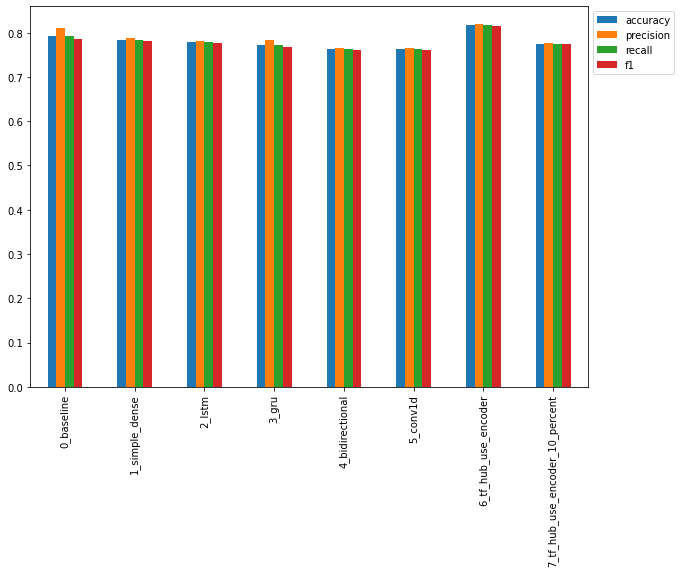

In [ ]:
# plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

<AxesSubplot:>

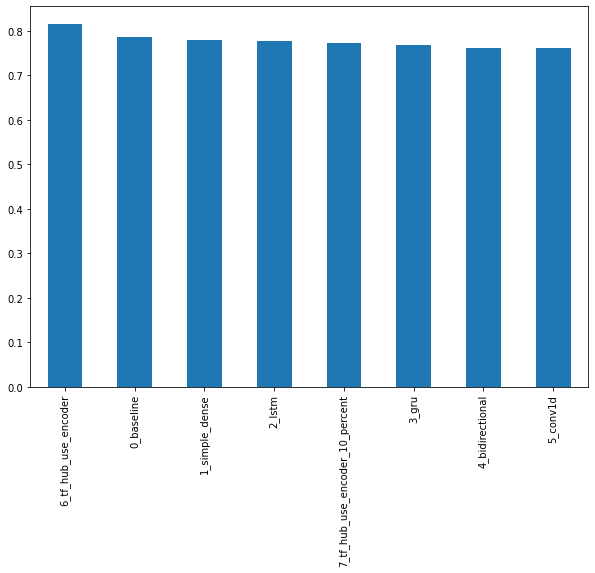

In [ ]:
# sort model result by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7))

# Uploading our model training logs to TensorBoard.dev

We can further inspect our model's performance using TensorBoard.dev:https://tensorboard.dev/

In [ ]:
# from tables import description
# # View TensorBoard logs of transfer learning modeling experiments
# # upload dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#   --name "NLP Modeling Experiments Course" \
#   --description "Comparing multiple different types of model archetecture on the kaggle tweet text classification datasets" \
#   --one_shot

https://tensorboard.dev/experiment/fywSMe5ATjO4rOzQ2J3fGQ/

In [ ]:
# see previous Tensorboard dev experiment list
# !tensorboard dev list

In [ ]:
# if you need to delete an experiment
# !tensorboard dev delete --experiment_id xyz

# Saving and loading a trained model

There are two main formats to save a model to in TensorFlow
1. The HDF5
2. the `savedModel` format (this is the default when using Tensorflow)

In [ ]:
# save TF hub senetnce Encoder model to HDF5
model_6.save("model_6.h5")

In [ ]:
# load model with custom hub layers (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model(("model_6.h5"),
                                            custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# how does our loaded model perform?
loaded_model_6.evaluate(val_sentence, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4299 - accuracy: 0.8163


[0.429918497800827, 0.8162729740142822]

Now let's save to the `SaveModel` format

In [ ]:
model_6.save("model_6_SaveModel_format")

In [ ]:
# load in a model from the SaveModel format
loaded_model_6_savemodel_format = tf.keras.models.load_model('model_6_SaveModel_format')

In [ ]:
# evaluate model in SaveModel format
loaded_model_6_savemodel_format.evaluate(val_sentence, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4299 - accuracy: 0.8163


[0.429918497800827, 0.8162729740142822]

# Finding the most wrong examples

- if our best model still isn't perfect, what examples is it getting wrong?
- And of these wrong examples which ones is it getting most wrong (those will predictions probabilities closest to the opposite class)

For examples if a sample should have a label of 0 but our model predicts a prediction probability of 0.999(really close to 1) and vice versa.

In [ ]:
# download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-03-09 12:20:57--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 108.177.11.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   118MB/s    in 7.1s    

2023-03-09 12:21:04 (128 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [ ]:
# import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained.evaluate(val_sentence, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentence)
model_6_pretrained_pred = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pretrained_pred[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# create DataFrame with validation sentences and best performing model prediction
val_df = pd.DataFrame({"test":val_sentence,
                       "target":val_labels,
                       "pred":model_6_pretrained_pred,
                       "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,test,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# find the most wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,test,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail()

,test,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
- 0 = not diaster
- 1 = diaster

In [ ]:
# check the false positive (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target:{target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("------\n")

Target:0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

------

Target:0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

------

Target:0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

------

Target:0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

------

Target:0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

------

Target:0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!



In [ ]:
# check the false negative (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target:{target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("------\n")

Target:1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

------

Target:1, Pred: 0.0, Prob: 0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

------

Target:1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

------

Target:1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

------

Target:1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

------

Target:1, Pred: 0.0, Prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

------

Target:1, Pred: 0.0, Pro

# Making predictions on the test dataset

In [ ]:
# making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred:{int(pred)}, Prob:{pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 230ms/step
Pred:0, Prob:0.19069397449493408
Text:
of electricity he had wire and a golf ball hooked up to catch a bolt of lightning and electrocute it you're not my brother I can tell. The

-----

1/1 [==============================] - 0s 195ms/step
Pred:0, Prob:0.10904203355312347
Text:
@Spencer_VH I hope you fall off a cliff

-----

1/1 [==============================] - 0s 127ms/step
Pred:0, Prob:0.43640026450157166
Text:
@SushmaSwaraj Am sure background check of the child's details are done before the kid gets into another upheaval.

-----

1/1 [==============================] - 0s 123ms/step
Pred:1, Prob:0.9599230289459229
Text:
Families to sue over Legionnaires - More than 40 families affected by the fatal outbreak of Legionnaires' disease ... http://t.co/urbl692Syj

-----

1/1 [==============================] - 0s 159ms/step
Pred:0, Prob:0.04554058238863945
Text:
Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody Free w/ Text. 

# Speed/Score Tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time - start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
#  calculate TF Hub Sentense Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentence)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 17ms/step


(0.7170344750011282, 0.0009409901246733966)

In [ ]:
# calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentence)
baseline_total_pred_time, baseline_time_per_pred

(0.049295906001134426, 6.469279002773546e-05)

In [ ]:
# get results for pretrained GS model
model_6_pretrained_result = calculate_result(y_true=val_labels,
                                             y_pred=model_6_pretrained_pred)
model_6_pretrained_result

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

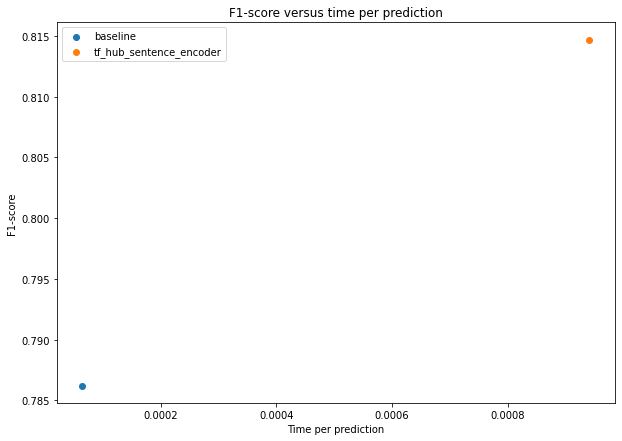

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_result["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_result["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");